In [7]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [ ]:
output = """Percent	Alignment	Type 2 d’
0	53.30%	0.2
10	63.00%	0.63
20	63.88%	0.69
30	64.60%	0.71
40	65.00%	0.76
50	65.30%	0.76
60	65.19%	0.75
70	65.13%	0.74
80	65.13%	0.74
90	65.05%	0.76
100	65.50%	0.76"""

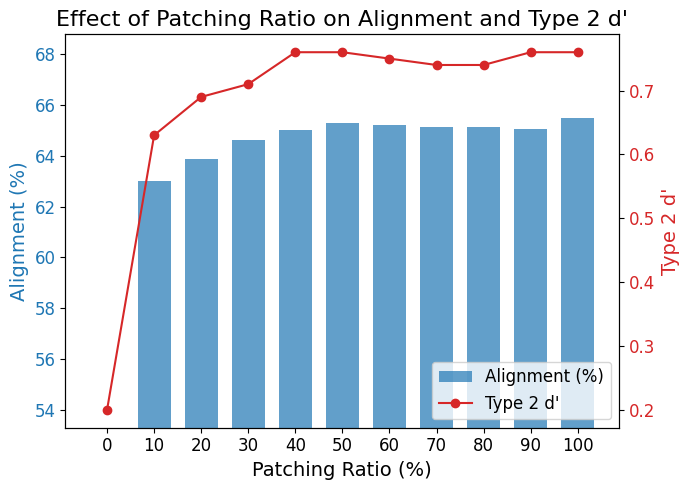

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Parse the output string into data
import pandas as pd
from io import StringIO

df = pd.read_csv(StringIO(output), sep='\t')
# Some versions may read Percent with a % still attached
if df['Percent'].dtype == object:
    df['Percent'] = df['Percent'].str.replace('%','').astype(float)

# Convert Alignment to numeric by removing % symbol
if df['Alignment'].dtype == object:
    df['Alignment'] = df['Alignment'].str.replace('%','').astype(float)

patching_ratio = df['Percent']
alignment = df['Alignment']
type2d = df["Type 2 d’"]  # The column uses the right single quote

fig, ax1 = plt.subplots(figsize=(7,5))

# Bar plot for alignment percentage
color_bar = 'tab:blue'
ax1.bar(patching_ratio, alignment, width=7, alpha=0.7, color=color_bar, label="Alignment (%)")
ax1.set_xlabel('Patching Ratio (%)', fontsize=14)
ax1.set_ylabel('Alignment (%)', color=color_bar, fontsize=14)
ax1.tick_params(axis='y', labelcolor=color_bar, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.set_xticks(patching_ratio)
# Set y-axis bottom to first alignment value
ax1.set_ylim(bottom=alignment.iloc[0])

# Create a second y-axis for type 2 d'
ax2 = ax1.twinx()
color_line = 'tab:red'
ax2.plot(patching_ratio, type2d, color=color_line, marker='o', label="Type 2 d'")
ax2.set_ylabel("Type 2 d'", color=color_line, fontsize=14)
ax2.tick_params(axis='y', labelcolor=color_line, labelsize=12)

# Add legends
h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc='lower right', fontsize=12)

plt.title("Effect of Patching Ratio on Alignment and Type 2 d'", fontsize=16)
plt.tight_layout()
plt.savefig("figures/weight-change-effect.pdf", dpi=300)
plt.show()
